In [1]:
import sys
sys.path.append('../src')
%load_ext autoreload
%autoreload 2
from predict_test_img import *
from predict_test_img import get_prediction_values
from character_recognition import *

import config
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

from character_training import load_model
import feature_extraction
import config
from character_recognition import character_recognition, filter_good_characters

logging.basicConfig(level=logging.INFO)


In [3]:
text_model = pickle.load(open(config.TEXT_MODEL_PATH, 'rb'))  # get model

character_model = load_model()
dictionary = np.load(config.DICT_PATH)  # get dictionary
image_files = glob.glob(os.path.join(config.TEST_IMAGE_PATH, '*.png'))

filename = image_files[0]

img = cv2.imread(filename)
logging.info('started computation for img {}'.
             format(filename.split('/')[-1].split('.')[0]))

predicted_layers = get_prediction_values(img, text_model, 4)

INFO:root:started computation for img test4
INFO:root:started for layer 0
INFO:root:pixel_counter: 0/2852 from layer 0
INFO:root:pixel_counter: 100/2852 from layer 0
INFO:root:pixel_counter: 200/2852 from layer 0
INFO:root:pixel_counter: 300/2852 from layer 0
INFO:root:pixel_counter: 400/2852 from layer 0
INFO:root:pixel_counter: 500/2852 from layer 0
INFO:root:pixel_counter: 600/2852 from layer 0
INFO:root:pixel_counter: 700/2852 from layer 0
INFO:root:pixel_counter: 800/2852 from layer 0
INFO:root:pixel_counter: 900/2852 from layer 0
INFO:root:pixel_counter: 1000/2852 from layer 0
INFO:root:pixel_counter: 1100/2852 from layer 0
INFO:root:pixel_counter: 1200/2852 from layer 0
INFO:root:pixel_counter: 1300/2852 from layer 0
INFO:root:pixel_counter: 1400/2852 from layer 0
INFO:root:pixel_counter: 1500/2852 from layer 0
INFO:root:pixel_counter: 1600/2852 from layer 0
INFO:root:pixel_counter: 1700/2852 from layer 0
INFO:root:pixel_counter: 1800/2852 from layer 0
INFO:root:pixel_counter: 1

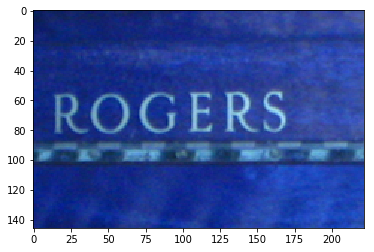

In [4]:
layer = 0 
img, predictions = predicted_layers[layer]
plt.imshow(img)

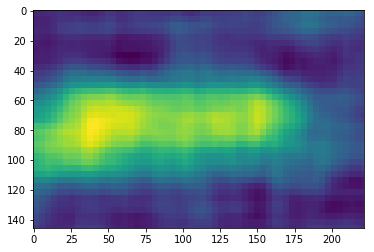

In [5]:
plt.imshow(predictions/predictions.max())

In [6]:
texts = []
#for layer, (layer_img, layer_predictions) in enumerate(predicted_layers):


np.save('{}/{}_layer_{}_prediction.npy'.format(
    config.TEST_IMAGE_PATH,
    filename.split('/')[-1].split('.')[0], layer),
    predictions)


print('Calculate Characters for layer {}'.format(
    img.shape))
layer_texts = character_recognition(img,
                                    predictions,
                                    dictionary,
                                    character_model)
texts.extend(filter_good_characters(layer_texts, layer))

INFO:root:Start predicting bbox
INFO:root:Predicting bbox of size 72x184 at 44,0


Calculate Characters for layer (146, 222, 3)


INFO:root:0/6273 prediction of window in bbox
INFO:root:100/6273 prediction of window in bbox
INFO:root:200/6273 prediction of window in bbox
INFO:root:300/6273 prediction of window in bbox
INFO:root:Yielded 429 and missed 0 windows
INFO:root:400/6273 prediction of window in bbox
../src/character_recognition.py:52: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y+gap_size)]) == \


In [17]:
texts[0].keys()

dict_keys(['x', 'y', 'characters', 'probabilities', 'filtered'])

In [21]:
pickle.dump(texts, open('{}/{}_character_predictions.pkl'.format(
    config.TEST_IMAGE_PATH,
    filename.split('/')[-1].split('.')[0]), 'wb'))
